# Counting children

Counting people doing things in a city is important. That's the purpose of the city, after all!

Children often wear bright colours -- far more so than adults -- and so have noticeable contrast to their
surroundings. But the kinds of places that it's interesting to count them (playgrounds, parks, etc.) often
have many moving objects, such as trees and shadows.

This notebook provides an example method of how to detect whether a swing is in use, just using footage
from a security camera.

In [1]:
%matplotlib inline
import matplotlib
import numpy
import skimage.io
import skimage.color
import skimage.filters
import skimage.morphology
import skimage.exposure

def show(im): matplotlib.pyplot.imshow(im, cmap=matplotlib.pyplot.cm.gray)
def show_as_grey(im): show(skimage.color.rgb2grey(im))
def show_colour(im): matplotlib.pyplot.imshow(im)
    
    
def colour_wash(im):    
    r = skimage.filters.rank.median(im[:,:,0], skimage.morphology.disk(31))
    g = skimage.filters.rank.median(im[:,:,1], skimage.morphology.disk(31))
    b = skimage.filters.rank.median(im[:,:,2], skimage.morphology.disk(31))
    return numpy.dstack((r, g, b))

def average_image(images):
    grayscales = [skimage.color.rgb2grey(im) for im in images]
    return numpy.median(numpy.array(grayscales), axis=0)

def middle_image_differences(images):
    return skimage.color.rgb2grey(images[len(images)/2+1]) - average_image(images)

def extremity_transform(im):
    dark_negatron = numpy.power(numpy.abs(im), 0.5)
    negatron = skimage.exposure.rescale_intensity(dark_negatron, 'image', (0.0, 1.0))
    return negatron

def simplify(im):
    return skimage.morphology.remove_small_objects(im, min_size=3000)

def show_overlay(original_image, mask):
    copy = original_image.copy()
    copy[mask == False] = (0,0,0)
    matplotlib.pyplot.imshow(copy)


In [2]:
a = skimage.io.imread('BeecroftPlayground/a.jpg')
b = skimage.io.imread('BeecroftPlayground/b.jpg')

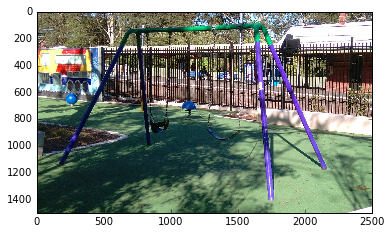

In [3]:
show_colour(a)

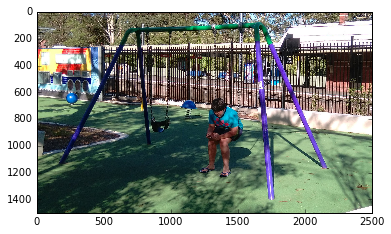

In [4]:
show_colour(b)

In [5]:
a1 = colour_wash(a)

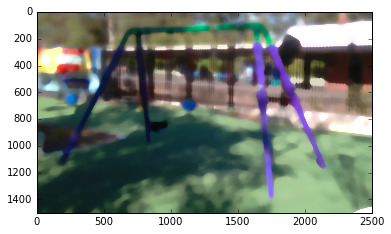

In [7]:
show_colour(a1)

In [6]:
b1 = colour_wash(b)

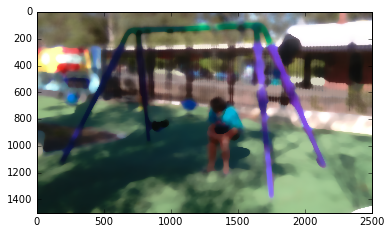

In [8]:
show_colour(b1)

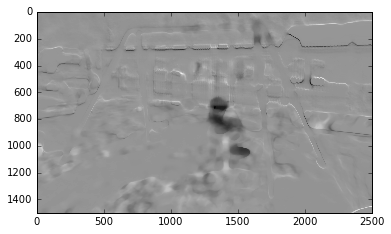

In [9]:
a2 = skimage.color.rgb2gray(a1)
b2 = skimage.color.rgb2gray(b1)
difference = b2 - a2
show(difference)

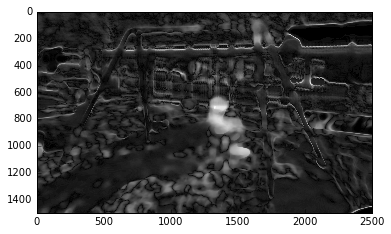

In [10]:
ext = extremity_transform(difference)
show(ext)

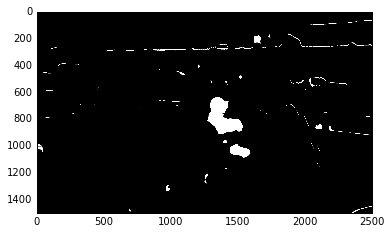

In [11]:
thresholded = ext > 0.5
show(thresholded)

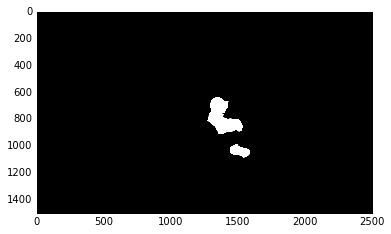

In [12]:
child = simplify(thresholded)
show(child)

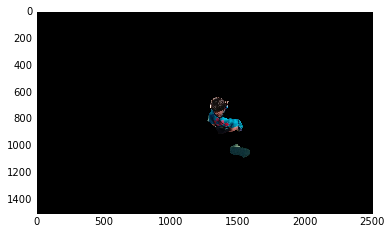

In [13]:
show_overlay(b, child)